
## Introduction to Naive Bayes

Naive Bayes classification is a probabilistic machine learning model that’s based on Bayes' Theorem. It’s called "naive" because it assumes that the presence (or absence) of a particular feature of a class is unrelated to the presence (or absence) of any other feature, even if these features depend on each other. This simplification makes Naive Bayes easy to build and particularly useful for very large datasets.

#### <b>Bayes' Theorem Foundation</b><br>

At its core, Naive Bayes relies on Bayes' Theorem, which describes the probability of an event, based on prior knowledge of conditions that might be related to the event. For classification, Bayes' Theorem is stated as:



\begin{equation}
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
\end{equation}

Here,P(B|A) is the probability of hypothesis A given data B. P(B|A) is the probability of the data under the hypothesis, P(A) is the probability of the hypothesis before seeing the data, and P(B) is the probability of the data under any hypothesis.

#### <b>Objectives of Naive Bayes Classification</b><br>

The objective in Naive Bayes is to determine the probability of a label given a set of features, and then predict the label with the highest probability. In other words, we calculate the posterior probability of each class given the input features and predict the class for which the posterior probability is the highest.

#### <b>What Naive Bayes Aims to achieve</b><br>

Naive Bayes aims to model the conditional probability of the class labels given the features in order to make predictions. It’s particularly advantageous in situations where the dimensionality of the input space is high, as it avoids the curse of dimensionality to a certain extent due to its feature independence assumption

#### <b>Variants of Naive Bayes</b><br>

There are several variants of the Naive Bayes classifier, each appropriate for a different type of dataset:

1. Gaussian Naive Bayes:

Used when features have a continuous distribution and an assumption of normal distribution (Gaussian) is reasonable.
Appropriate for many real-world problems, like predicting whether a given email is spam or not.

2. Multinomial Naive Bayes:

Used for discrete data where features represent counts or frequency counts of events.
Often used in text classification, where the features are related to word counts or frequencies within the documents.

3. Bernoulli Naive Bayes:

Used when features are binary (i.e., they take only two values like true and false).
Suitable for making predictions from binary features, like if a word occurs in a document or not, which is a common scenario in text classification problems.


##  Prepare Data for Naïve Bayes

1.Handle missing values

2.Encode the 'Income group' and 'Continent' categorical variables into a numerical format suitable for machine learning models.

3.Split the data into training and test sets

In [585]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
df_mental_health=pd.read_csv('./Data_cleaned/mental_health.csv')

Check missing values in the dataset

In [586]:
missing_data=df_mental_health.isnull().sum()
print(missing_data)
print(df_mental_health.shape)

Economy                                                             0
Code                                                                0
Year                                                                0
Schizophrenia (%)                                                   0
Bipolar disorder (%)                                                0
Eating disorders (%)                                                0
Anxiety disorders (%)                                               0
Depression (%)                                                      0
Income group                                                       56
average_learning_Adjusted_of_school                               812
Continent                                                         588
GDP(2022)                                                         224
not_at_all_comfortable_speaking_anxiety_or_depression_percent    2380
GDP_per_capita                                                   1020
dtype: int64
(5488, 

##### 1.Handle missing values
a.Dropping columns with more than 1000 null values

(We don't Remove Rows with Missing Values because although this is the simplest approach, but it can lead to a significant reduction in data size, which might not be ideal if the missing data is extensive.)

so after this step, we dropped the column not_at_all_comfortable_speaking_anxiety_or_depression_percent


In [587]:

threshold = 1030  # Set the threshold for the minimum number of non-NA values required
df_mental_health = df_mental_health.dropna(axis=1, thresh=(len(df_mental_health) - threshold))
# Display the columns remaining after the operation
missing_data = df_mental_health.isnull().sum()
print(missing_data)
Nr0=len(df_mental_health.index)
Nc0=len(df_mental_health.columns)
print("Nrows = ",Nr0,"\nNcol=",Nc0,"\nMatrix entries = ", Nr0*Nc0)
# missing_data1 = encoded_data1.isnull().sum()
# print(missing_data1)


Economy                                   0
Code                                      0
Year                                      0
Schizophrenia (%)                         0
Bipolar disorder (%)                      0
Eating disorders (%)                      0
Anxiety disorders (%)                     0
Depression (%)                            0
Income group                             56
average_learning_Adjusted_of_school     812
Continent                               588
GDP(2022)                               224
GDP_per_capita                         1020
dtype: int64
Nrows =  5488 
Ncol= 13 
Matrix entries =  71344


b.Impute Missing Values:

Mean/Median/Mode Imputation: Replace missing values with the mean, median, or mode of the column. This is a common strategy for numerical data.

Forward or Backward Fill: For time-series data, we can fill missing values with the next or previous values.

Predictive Imputation: Use a machine learning algorithm to predict the missing values based on other data in the dataset.

Mean/Median Imputation: If the data is normally distributed, you might use the mean. 
If the distribution is skewed,the median might be more appropriate.

/var/folders/px/bhxss9d10zs_wzsv0ck6sb200000gn/T/ipykernel_57004/2298538592.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_mental_health['GDP(2022)'])
/var/folders/px/bhxss9d10zs_wzsv0ck6sb200000gn/T/ipykernel_57004/2298538592.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_mental

<Axes: xlabel='GDP_per_capita', ylabel='Density'>

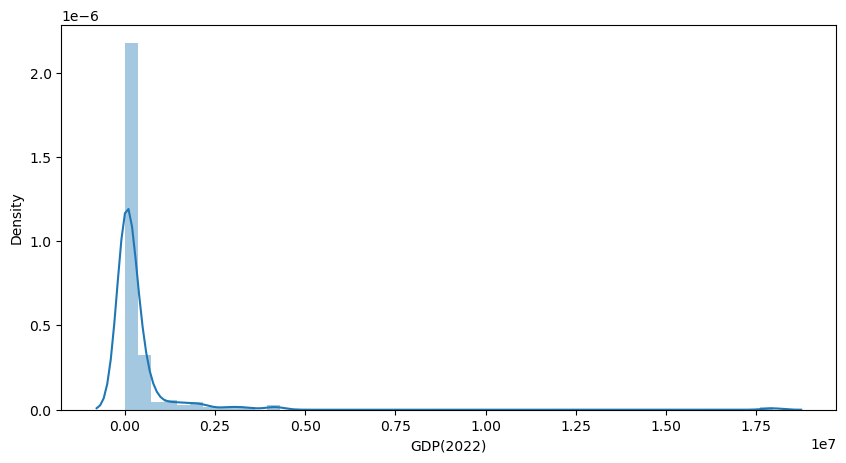

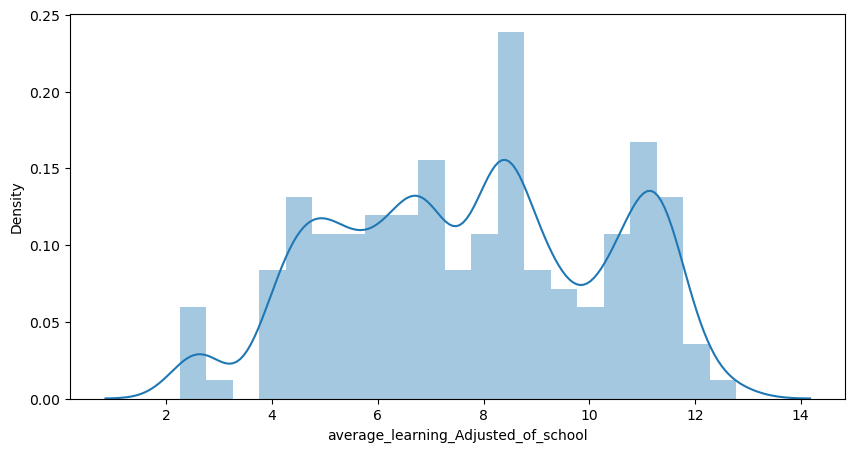

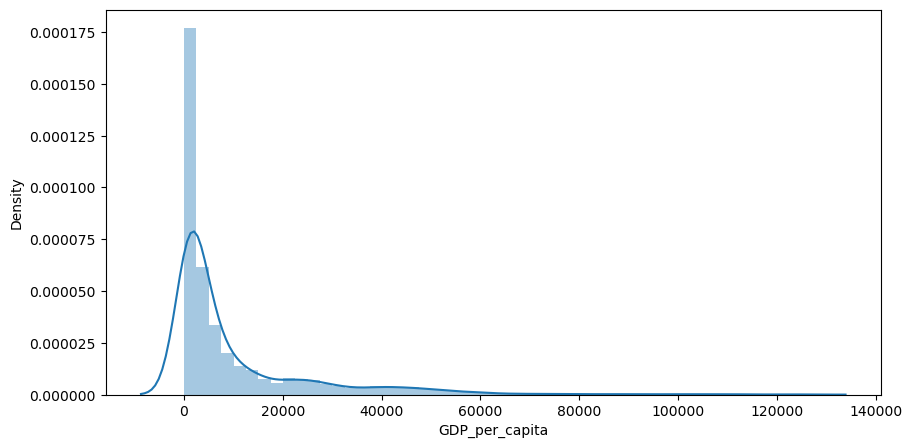

In [574]:
import seaborn as sns
#1.plot the GDP(2022) in df_mental_health
plt.figure(figsize=(10, 5))
sns.distplot(df_mental_health['GDP(2022)'])
#2.plot the average_learning_Adjusted_of_school in df_mental_health
plt.figure(figsize=(10, 5))
sns.distplot(df_mental_health['average_learning_Adjusted_of_school'])
#3. plot the gdp_per_capita in df_mental_health
plt.figure(figsize=(10, 5))
sns.distplot(df_mental_health['GDP_per_capita'])
#3.although income group and df_mental_health also have a lot of missing values
#  but we can not plot  because it is a categorical variable

 so here we impute missing values using the mean for GDP(2022) and the median for average_learning_Adjusted_of_school (assuming the distributions are appropriate for these measures):

In [575]:

# Impute missing values with the mean for GDP(2022)
df_mental_health['GDP(2022)'].fillna(df_mental_health['GDP(2022)'].mean(), inplace=True)

# Impute missing values with the median for average_learning_Adjusted_of_school
df_mental_health['average_learning_Adjusted_of_school'].fillna(df_mental_health['average_learning_Adjusted_of_school'].median(), inplace=True)

# Impute missing values with the median for GDP_per_capita
df_mental_health['GDP_per_capita'].fillna(df_mental_health['GDP_per_capita'].median(), inplace=True)
missing_data = df_mental_health.isnull().sum()

# # impute missing values with mode for Continent
# df_mental_health['Continent'].fillna(df_mental_health['Continent'].mode()[0], inplace=True)
print(missing_data)

Economy                                  0
Code                                     0
Year                                     0
Schizophrenia (%)                        0
Bipolar disorder (%)                     0
Eating disorders (%)                     0
Anxiety disorders (%)                    0
Depression (%)                           0
Income group                            56
average_learning_Adjusted_of_school      0
Continent                              588
GDP(2022)                                0
GDP_per_capita                           0
dtype: int64


c. Drop Rows ('Income group') with Missing Values:

The 'Income group' and 'Continent' columns still have missing values. Before we proceed with the Naive Bayes classification, we need to address these missing values. Since 'Income group' will be our target variable for classification, we cannot impute it as we did with the continuous variables. Instead, we should remove the rows with missing 'Income group' labels.

As for the 'Continent' column, it might not be necessary for our classification model if we're using economic, educational and health indicators as features.(we don't need to preprocess it because can just dont choose the feature in the feature selection). 

However, if we decide that continent information might be useful, we could either impute the missing values based on the 'Economy' column or drop the column if it's not required.

In [576]:
# Droping rows where 'Income group' annd 'continent' is missing since it's our target variable
df_mental_health = df_mental_health.dropna(subset=['Income group'])

df_mental_health=df_mental_health.dropna(subset=['Continent'])

# Verifying that there are no more missing values
missing_values_final = df_mental_health.isnull().sum()
missing_values_final, df_mental_health.shape

(Economy                                0
 Code                                   0
 Year                                   0
 Schizophrenia (%)                      0
 Bipolar disorder (%)                   0
 Eating disorders (%)                   0
 Anxiety disorders (%)                  0
 Depression (%)                         0
 Income group                           0
 average_learning_Adjusted_of_school    0
 Continent                              0
 GDP(2022)                              0
 GDP_per_capita                         0
 dtype: int64,
 (4872, 13))

In [577]:
# Save the cleaned dataframe to a new CSV file
df_mental_health.to_csv('./Data_cleaned/mental_health_DR.csv', index=False)

The dataset is now clean and ready for classification. We can proceed with the next step.   

## Feature selection
Decide which features are relevant for our classification task(Naive Bayes model) and drop the rest.

The 'Income group' is a categorical variable that could be used as a label for classification, so we predict the 'Income group' based on health and economic indicators.

method:
 1. EDA to find the correlation between the features and the target variable


Corralation matrix

Index(['Economy', 'Code', 'Year', 'Schizophrenia (%)', 'Bipolar disorder (%)',
       'Eating disorders (%)', 'Anxiety disorders (%)', 'Depression (%)',
       'Income group', 'average_learning_Adjusted_of_school', 'Continent',
       'GDP(2022)', 'GDP_per_capita'],
      dtype='object')


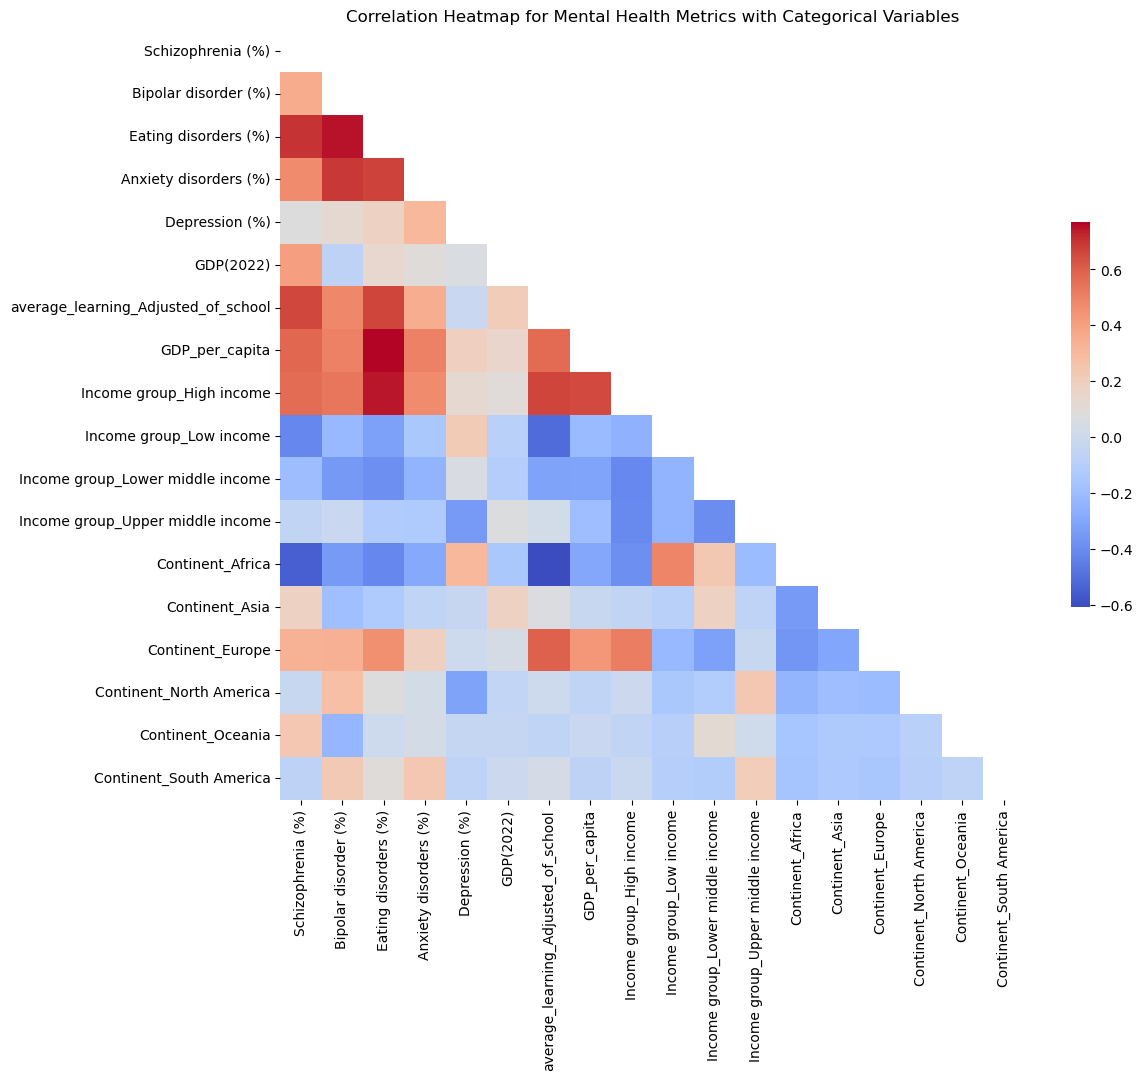

<class 'pandas.core.frame.DataFrame'>


In [578]:
print(df_mental_health.columns)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# # Load the cleaned dataset
# file_path = './Data/mental_health.csv'
# data = pd.read_csv(file_path)

correlation_columns = [
    'Schizophrenia (%)', 
    'Bipolar disorder (%)', 
    'Eating disorders (%)', 
    'Anxiety disorders (%)', 
    'Depression (%)', 
    'GDP(2022)',
    'average_learning_Adjusted_of_school',
    'GDP_per_capita',
    # 'Income group',
    # 'Continent',
]
# One-hot encoding the 'Income group' and 'Continent' columns to include them in the correlation matrix
encoded_data = pd.get_dummies(df_mental_health, columns=['Income group', 'Continent'])
# encoded_data.to_csv('./mental_health_encoded.csv', index=False)

# Updating the correlation_columns list to include the newly created one-hot encoded columns
new_correlation_columns = correlation_columns + list(encoded_data.columns[encoded_data.columns.str.startswith('Income group_')]) + list(encoded_data.columns[encoded_data.columns.str.startswith('Continent_')])

# Calculate the new correlation matrix including the one-hot encoded columns
new_correlation_matrix = encoded_data[new_correlation_columns].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(new_correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask
sns.heatmap(new_correlation_matrix, mask=mask, annot=False, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .5})

# Add title
plt.title('Correlation Heatmap for Mental Health Metrics with Categorical Variables')

# Show the heatmap
plt.show()
# print(encoded_data.head())
print(type(encoded_data))
# print(new_correlation_matrix)




Strong Correlation: Values above 0.7 or below -0.7 suggest a strong correlation between the variables.
Moderate Correlation: Values between 0.3 and 0.7 (or -0.3 and -0.7) suggest a moderate correlation.
Weak Correlation: Values between 0 and 0.3 (or 0 and -0.3) suggest a weak correlation.

2. Pearson Correlation

The Pearson correlation coefficients you've provided show the linear relationship between each feature and the 'Income group' target variable. A coefficient close to 1 or -1 indicates a strong positive or negative linear relationship, respectively. A coefficient close to 0 suggests no linear relationship.


In [579]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# For Pearson Correlation, we would ideally have only numeric features and labels
# so we will encode the categorical features (Income group and Continent) using LabelEncoder
# Encoding the 'Income group' column to have numerical labels
label_encoder = LabelEncoder()
df_mental_health['Income group'] = label_encoder.fit_transform(df_mental_health['Income group'])
# # Encoding the 'Continent' column to have numerical labels
df_mental_health['Continent'] = label_encoder.fit_transform(df_mental_health['Continent'])

# Compute the Pearson Correlation matrix
correlation_matrix = df_mental_health.corr()
# print(correlation_matrix)
# Selecting only correlations with the target variable (assuming target is numeric)
target_correlation = correlation_matrix['Income group'].sort_values(ascending=False)

# Review the correlations and decide on a threshold for selecting features
print(target_correlation)

Income group                           1.000000e+00
Continent                              4.922567e-02
Year                                   1.896820e-14
GDP(2022)                             -2.367410e-02
Depression (%)                        -2.902212e-01
Schizophrenia (%)                     -3.333968e-01
Bipolar disorder (%)                  -3.571665e-01
average_learning_Adjusted_of_school   -3.573466e-01
Anxiety disorders (%)                 -3.730074e-01
GDP_per_capita                        -5.197356e-01
Eating disorders (%)                  -5.284877e-01
Name: Income group, dtype: float64


/var/folders/px/bhxss9d10zs_wzsv0ck6sb200000gn/T/ipykernel_57004/3613746690.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_mental_health.corr()


Now, we can decide which features to drop based on their correlation with the target and their inter-correlations with other features

Select: <br>
Eating disorders (%): With a correlation coefficient of approximately -0.53, this feature has the strongest negative linear relationship with the 'Income group' and is likely to be the most informative for predicting income group; Anxiety disorders (%), Schizophrenia (%), average_learning_Adjusted_of_school, Bipolar disorder (%), Depression (%) and GDP per capita: All of these features have moderate negative correlations with the 'Income group', meaning as these percentages increase, the likelihood of being in a higher income group decreases.


Drop:<br>
GDP(2022) and Continent: These features has a very weak negative correlation with the 'Income group', suggesting it might not be very useful for predicting the income group on its own. so we drop these features; Year: The correlation is effectively zero, indicating no linear relationship with the 'Income group'. sp we drop this feature.


So in this example, features excluding 'Year' and 'GDP(2022)' and 'Continent" are used for classification.

### Naïve Bayes (NB) with Labeled Record Data

In [580]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# print(df_mental_health.info())
# #save df_mental_health to csv
# df_mental_health.to_csv('./Data/mental_health_DT.csv', index=False) # this is the cleaned data of the mental health and income group
# print(df_mental_health.head())


# Selecting features and target variable
# print(X.columns)
X = df_mental_health.drop(['Economy', 'Code', 'Income group', 'Year','GDP(2022)','Continent'], axis=1)
y = df_mental_health['Income group']
# print(X.columns)
# Splitting the dataset into training (70%), validation (15%), and testing (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
# Checking the shape of the datasets
(X_train.shape, X_val.shape, X_test.shape), (y_train.shape, y_val.shape, y_test.shape)

# Train the Naïve Bayes model
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Validate the model
y_val_pred = nb_classifier.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_classification_report = classification_report(y_val, y_val_pred)
val_confusion_matrix = confusion_matrix(y_val, y_val_pred)

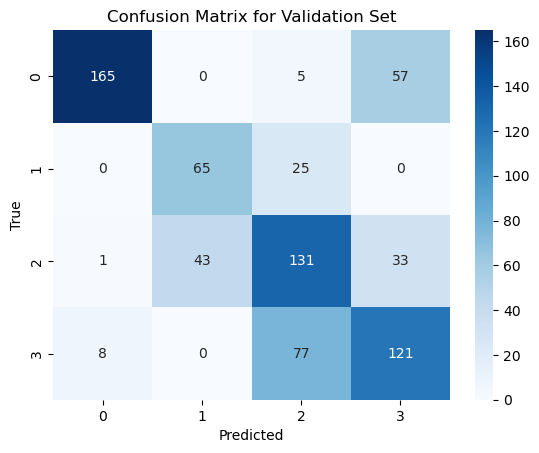

In [581]:
# Visualize the confusion matrix
sns.heatmap(val_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Validation Set')
plt.show()


In [582]:
# Evaluate the model using the validation set
print(f"Validation Accuracy: {val_accuracy}")
print(f"Classification Report for Validation Set:\n{val_classification_report}")

Validation Accuracy: 0.6593707250341997
Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.95      0.73      0.82       227
           1       0.60      0.72      0.66        90
           2       0.55      0.63      0.59       208
           3       0.57      0.59      0.58       206

    accuracy                           0.66       731
   macro avg       0.67      0.67      0.66       731
weighted avg       0.69      0.66      0.67       731



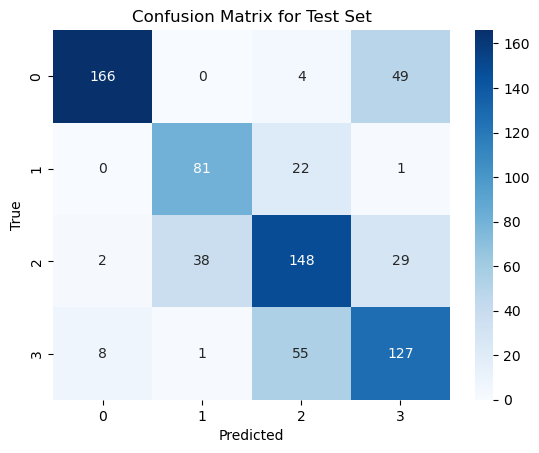

Test Accuracy: 0.7140902872777017
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.94      0.76      0.84       219
           1       0.68      0.78      0.72       104
           2       0.65      0.68      0.66       217
           3       0.62      0.66      0.64       191

    accuracy                           0.71       731
   macro avg       0.72      0.72      0.72       731
weighted avg       0.73      0.71      0.72       731



In [583]:
# Test the model
y_test_pred = nb_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

# Visualize the confusion matrix for the test set
sns.heatmap(test_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Test Set')
plt.show()

# Evaluate the model using the test set
print(f"Test Accuracy: {test_accuracy}")
print(f"Classification Report for Test Set:\n{test_classification_report}")


## Naïve Bayes (NB) with Labeled Text Data
Predict if it descrbes a mental health problem based on the symptoms
Preprocess the "Symptoms" text data with vectorization.

1. The dataset is structured with two columns: 'Symptoms' and 'Label'. load the dataset
2. Preprocess the text data in the 'Symptoms' column. This includes cleaning and tokenizing the text, normalizing it, and removing stop words.
3. Encode the 'Label' column to numerical values, as Naive Bayes requires numerical input.
4. Split the data into training and testing sets.
5. Train a Naive Bayes classifier on the training set.
6. Evaluate the model on the testing set.

0.8157894736842105
                 precision    recall  f1-score   support

  Mental health       0.86      0.82      0.84        22
Physical health       0.76      0.81      0.79        16

       accuracy                           0.82        38
      macro avg       0.81      0.82      0.81        38
   weighted avg       0.82      0.82      0.82        38



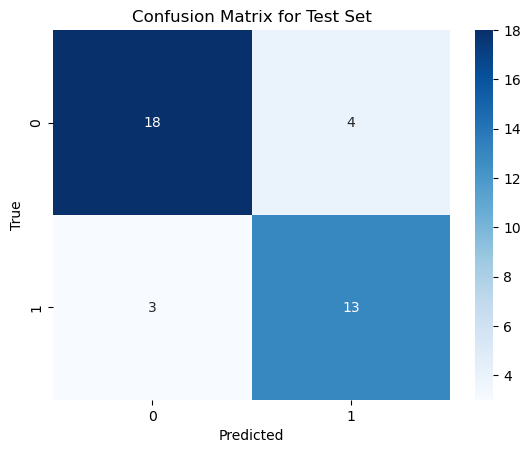

In [584]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
# Attempt to read the CSV file while skipping problematic lines
try:
    new_data = pd.read_csv('./Data_cleaned/symptoms.csv',on_bad_lines='skip')
    # Display the first few rows of the dataframe and the number of rows skipped
    new_first_rows = new_data.head()
    new_num_rows = new_data.shape[0]
    new_exception_message = None
except Exception as e:
    new_first_rows, new_num_rows, new_exception_message = None, None, str(e)

new_first_rows, new_num_rows, new_exception_message

# Initialize the vectorizer and label encoder
vectorizer = CountVectorizer()
label_encoder = LabelEncoder()

# Vectorize the 'Symptoms' text
X = vectorizer.fit_transform(new_data['Symptoms'])

# Encode the 'Label' column
y = label_encoder.fit_transform(new_data['Label'])

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(accuracy)
print(classification_rep)

test_confusion_matrix = confusion_matrix(y_test, y_pred)
# Visualize the confusion matrix for the test set
sns.heatmap(test_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Test Set')
plt.show()

